# Trend and Seasonality

In [1]:
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas import datetime
from pandas import Series
import matplotlib.pyplot as plt

Dekompozycja szeregów czasowych opiera się na myślenie o szeregu czasowym jako kombinacji:

- trendu, 
- sezonowości, 
- szumu.


Szereg czasowy zazwyczaj składa się z części powtarzającej się i szumu:

- Level: Średnia wartość w szeregu czasowym.
- Trend: Wzrastająca lub malejąca wartość w szeregu czasowym.
- Seasonality:  powtarzający się cykl krótkoterminowy w szeregu czasowym.
- Noise : losowe zaburzenia w szeregu czasowym.

Uważa się, że szereg czasowy jest agregatem lub kombinacją tych czterech elementów.
Wszystkie szeregi czasowe mają poziom (level) i szum. Elementy trendu i sezonowości są opcjonalne.

### Additive Model

y(t) = Level + Trend + Seasonality + Noise

### Multiplicative Model

y(t) = Level * Trend * Seasonality * Noise

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose
from random import randrange

# Przykład
Dla poniższych danych wykonaj dekompozycję zarówno <tt>additive</tt> jak i <tt>multiplicative</tt> na:
- trend
- sezonowość
- szum

In [3]:
data = [i+randrange(10) for i in range(1,100)]
series = pd.Series(data)

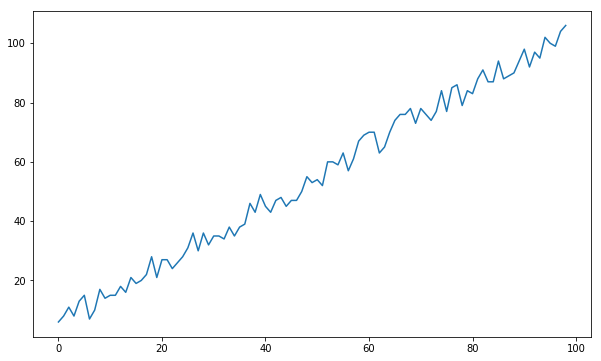

In [4]:
plt.figure(figsize=(10,6));
series.plot()
plt.show()

In [5]:
result = seasonal_decompose(data, model='additive', freq=1)

In [6]:
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

[  6.   8.  11.   8.  13.  15.   7.  10.  17.  14.  15.  15.  18.  16.
  21.  19.  20.  22.  28.  21.  27.  27.  24.  26.  28.  31.  36.  30.
  36.  32.  35.  35.  34.  38.  35.  38.  39.  46.  43.  49.  45.  43.
  47.  48.  45.  47.  47.  50.  55.  53.  54.  52.  60.  60.  59.  63.
  57.  61.  67.  69.  70.  70.  63.  65.  70.  74.  76.  76.  78.  73.
  78.  76.  74.  77.  84.  77.  85.  86.  79.  84.  83.  88.  91.  87.
  87.  94.  88.  89.  90.  94.  98.  92.  97.  95. 102. 100.  99. 104.
 106.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

<Figure size 864x432 with 0 Axes>

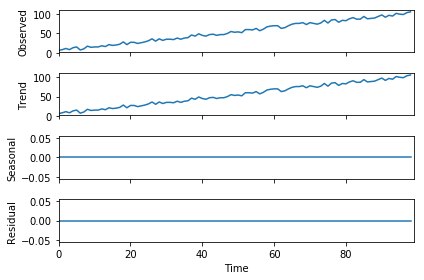

In [7]:
plt.figure(figsize=(12,6));
result.plot()
plt.show()

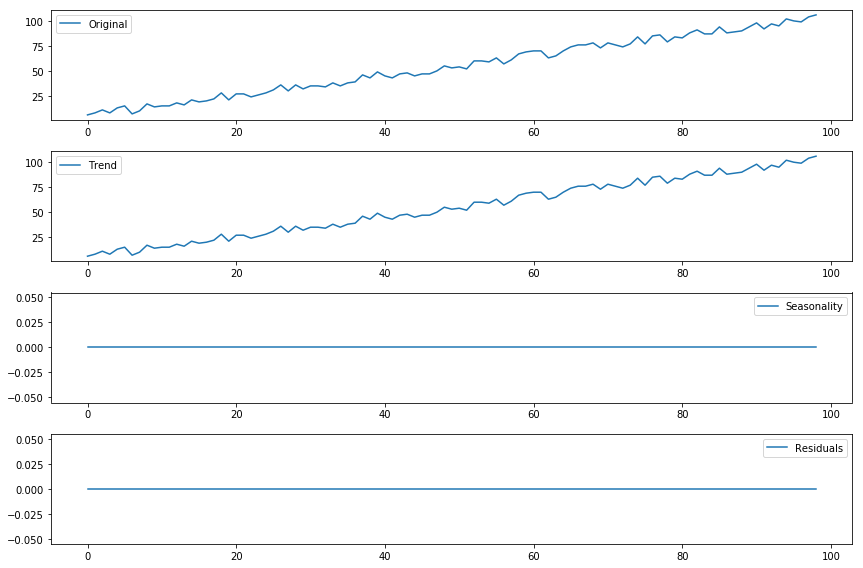

In [8]:
plt.figure(figsize=(12,8));
plt.subplot(411)
plt.plot(result.observed, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(result.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Zadanie
Dla poniższych danych wykonaj dekompozycję zarówno <tt>additive</tt> jak i <tt>multiplicative</tt> na:
- trend
- sezonowość
- szum

In [9]:
series = [i**2.0 for i in range(1,100)]
result = seasonal_decompose(series, model='additive', freq=1)

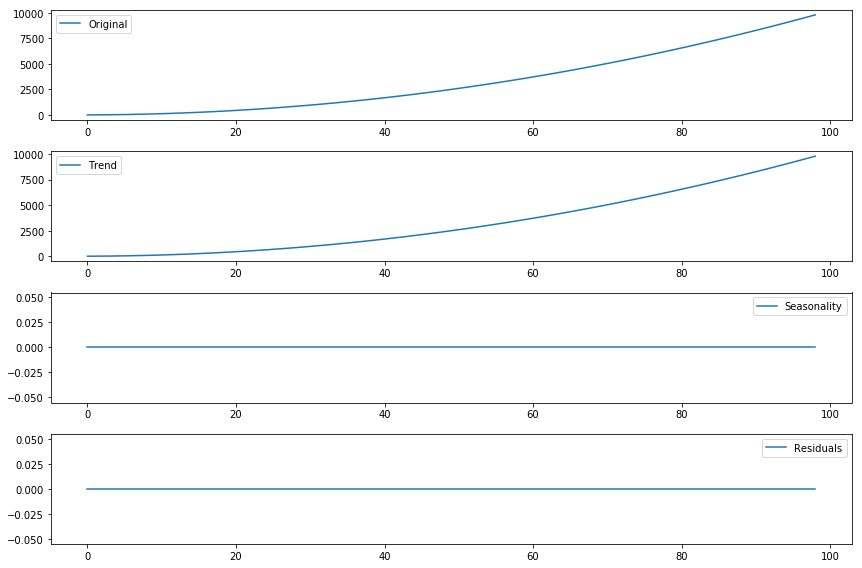

In [10]:
plt.figure(figsize=(12,8));
plt.subplot(411)
plt.plot(result.observed, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(result.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Zadanie
Dla poniższych danych wykonaj dekompozycję zarówno <tt>additive</tt> jak i <tt>multiplicative</tt> na:
- trend
- sezonowość
- szum

In [11]:
series = Series.from_csv('daily-minimum-temperatures.csv', header=0)
result = seasonal_decompose(series, model='additive', freq=365)

C:\Users\przem\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py:3724: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


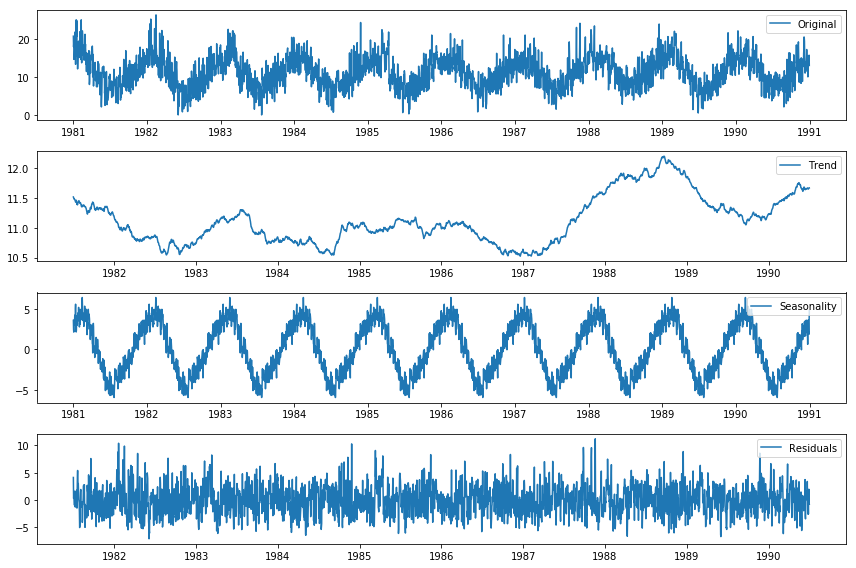

In [12]:
plt.figure(figsize=(12,8));
plt.subplot(411)
plt.plot(result.observed, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(result.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Zadanie
Dla poniższych danych wykonaj dekompozycję zarówno <tt>additive</tt> jak i <tt>multiplicative</tt> na:
- trend
- sezonowość
- szum

In [13]:
series = Series.from_csv('international-airline-passengers.csv', header=0)            
result = seasonal_decompose(series, model='additive')

C:\Users\przem\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py:3724: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


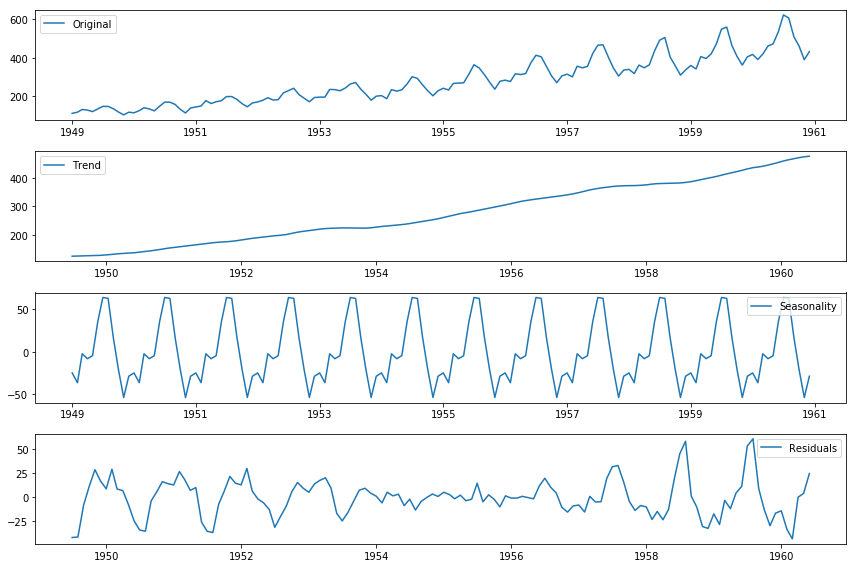

In [14]:
plt.figure(figsize=(12,8));
plt.subplot(411)
plt.plot(result.observed, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(result.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [15]:
result = seasonal_decompose(series, model='multiplicative')

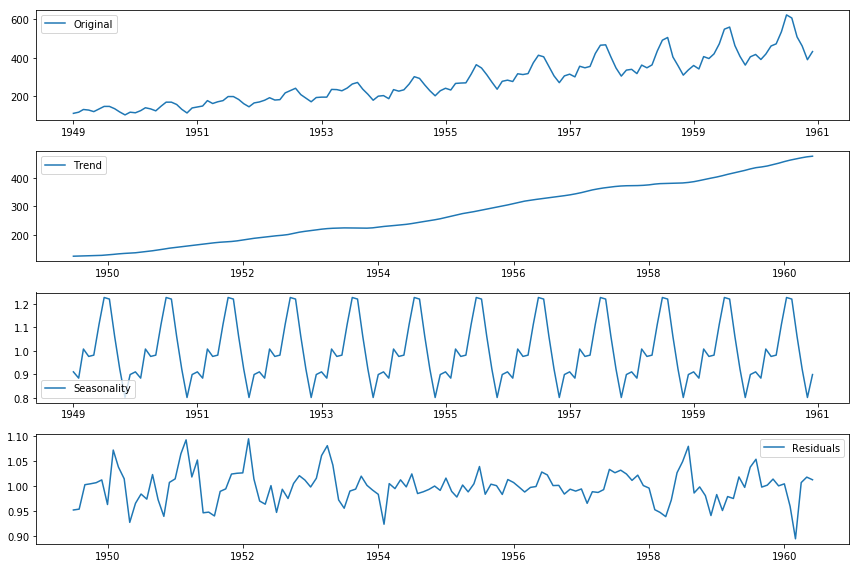

In [16]:
plt.figure(figsize=(12,8));
plt.subplot(411)
plt.plot(result.observed, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(result.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()